In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [181]:
def rel_speedup(x):
    return x.iloc[0] / x.iloc[1]

def calc_rel_speedup(r):
    return r.rolling(2).apply(rel_speedup)

def read_results(folder: str) -> pd.DataFrame:
    dfl = []
    for resultfile in glob.glob(f"{folder}/*.csv"):
        dfl += [pd.read_csv(resultfile, index_col=0)]
    df = pd.concat(dfl)
    df['speedup'] = df.time_baseline / df.time_amalur
    df = df.reset_index(drop=True)

    base_rel_speedup = pd.Series(dtype='float64')
    amalur_rel_speedup = pd.Series(dtype='float64')
    for _, dfg in df.sort_values('num_cores').groupby(['dataset', 'join', 'operator']):
        base_rel_speedup = pd.concat([base_rel_speedup, dfg.time_baseline.rolling(2).apply(rel_speedup)])
        amalur_rel_speedup = pd.concat([amalur_rel_speedup, dfg.time_amalur.rolling(2).apply(rel_speedup)])
    df['relative_baseline_speedup'] = base_rel_speedup
    df['relative_amalur_speedup'] = amalur_rel_speedup
    return df

In [182]:
df = read_results("../run2")
df

,dataset,join,operator,time_baseline,time_amalur,complexity_baseline,complexity_amalur,TR,FR,num_cores,speedup,relative_baseline_speedup,relative_amalur_speedup
0,book,inner,Left multiply,0.001981,0.000349,2.024960e+06,3.334880e+05,0.557832,1.914246,64,5.680745,1.025490,0.869741
1,book,inner,Row summation,0.005899,0.002759,2.024960e+06,3.334880e+05,0.557832,1.914246,64,2.138323,1.023193,1.048021
2,book,inner,Column summation,0.006953,0.004497,2.024960e+06,3.334880e+05,0.557832,1.914246,64,1.546269,1.007065,1.004028
3,book,inner,Materialization,NaN,0.046966,NaN,NaN,NaN,NaN,64,NaN,NaN,1.526149
4,book,inner,LMM,0.015323,0.034372,2.067256e+11,6.357635e+10,0.557832,1.914246,64,0.445795,1.032401,1.505181
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,yelp,outer,Row summation T,0.021820,0.004658,6.984592e+06,5.502170e+05,0.262913,3.750214,32,4.684356,1.009544,0.997661
1256,yelp,outer,Column summation T,0.006091,0.004645,6.984592e+06,5.502170e+05,0.262913,3.750214,32,1.311070,1.016406,1.001719
1257,yelp,outer,LMM T,0.005371,0.025539,1.201115e+11,1.200472e+11,0.262913,3.750214,32,0.210301,1.001801,2.275970
1258,yelp,outer,RMM T,0.078912,0.020625,1.973864e+12,2.144730e+11,0.262913,3.750214,32,3.826115,1.007133,2.314231


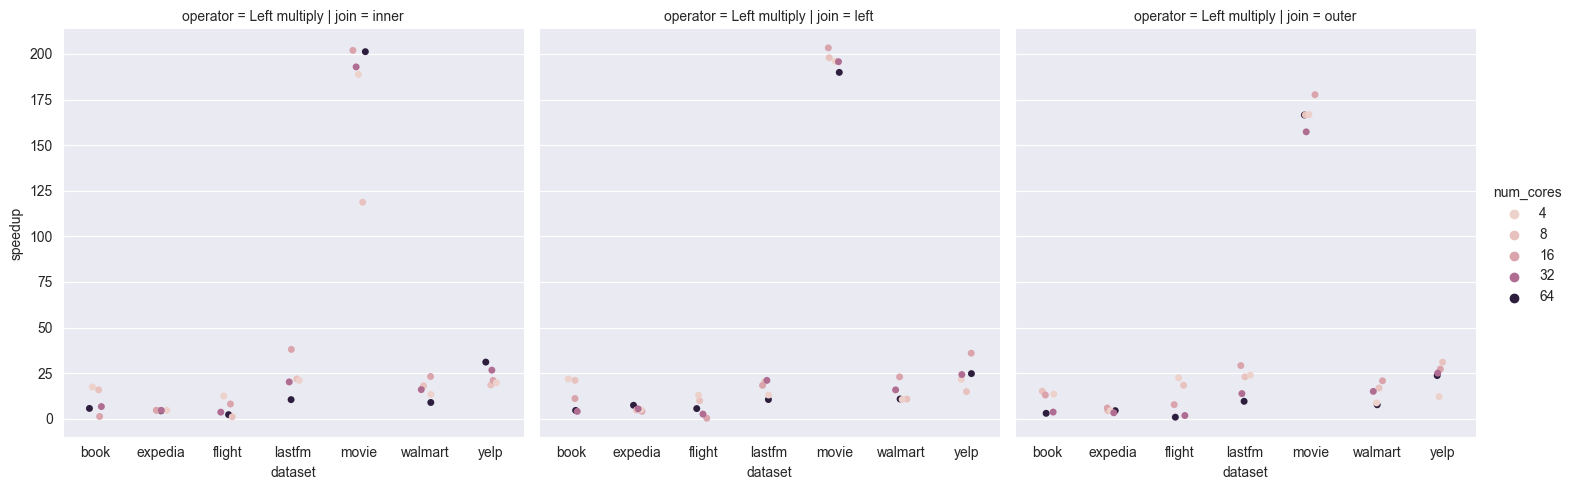

In [197]:
fig = sns.catplot(data=df[df.operator == 'Left multiply'], x='dataset', y='speedup', hue='num_cores', col='join', row='operator', sharex=False, sharey="row")

In [205]:
df[df.operator == 'Linear Regression'][['dataset', 'join', 'time_baseline', 'time_amalur', 'speedup', 'num_cores']].sort_values(['dataset', 'num_cores']).groupby(['dataset','join']).max('speedup')

time_baseline  time_amalur   speedup  num_cores
dataset join                                                  
book    inner       1.014650    16.882970  0.971388         64
        left        1.057770    17.995529  0.828448         64
        outer       0.896884    16.308560  0.792183         64
expedia inner       9.575386    39.570037  1.630697         64
        left        9.462166    63.329013  1.829579         64
        outer       8.661731    60.921416  1.483135         64
flight  inner       0.499792     9.375641  0.924380         64
        left        0.499888    11.486806  0.920795         64
        outer       0.476759    10.599578  0.865876         64
lastfm  inner       1.742190    14.604705  1.504400         64
        left        1.737859    12.881913  1.284369         64
        outer       1.543447    13.772158  1.264154         64
movie   inner       8.640643    22.434021  3.674778         64
        left        8.734100    20.556900  3.717635         64
        outer       7.270760    21.235113  3.514561         64
walmart inner       1.959400    14.822885  1.388457         64
        left        1.952664    18.636940  1.336770         64
        outer       1.743212    19.752855  1.104373         64
yelp    inner       2.680274    11.728628  3.103507         64
        left        2.712913    13.531705  2.525800         64
        outer       2.284022    18.391218  2.580692         64

In [206]:
df[df.operator == 'Linear Regression'][['dataset', 'join', 'time_baseline', 'time_amalur', 'speedup', 'num_cores']].sort_values(['dataset', 'num_cores'])

,dataset,join,time_baseline,time_amalur,speedup,num_cores
767,book,inner,1.007407,16.882970,0.059670,4
779,book,left,1.020852,17.995529,0.056728,4
791,book,outer,0.878536,16.308560,0.053870,4
263,book,inner,0.998443,8.231700,0.121292,8
275,book,left,1.009156,7.664171,0.131672,8
...,...,...,...,...,...,...
1247,yelp,left,2.671420,1.554666,1.718324,32
1259,yelp,outer,2.246484,1.540953,1.457854,32
227,yelp,inner,2.680173,0.863595,3.103507,64
239,yelp,left,2.689119,1.064660,2.525800,64


In [48]:
fig.savefig("prelim_core_vis.pdf", dpi=400)
df.to_csv("prelim_core_data.csv")

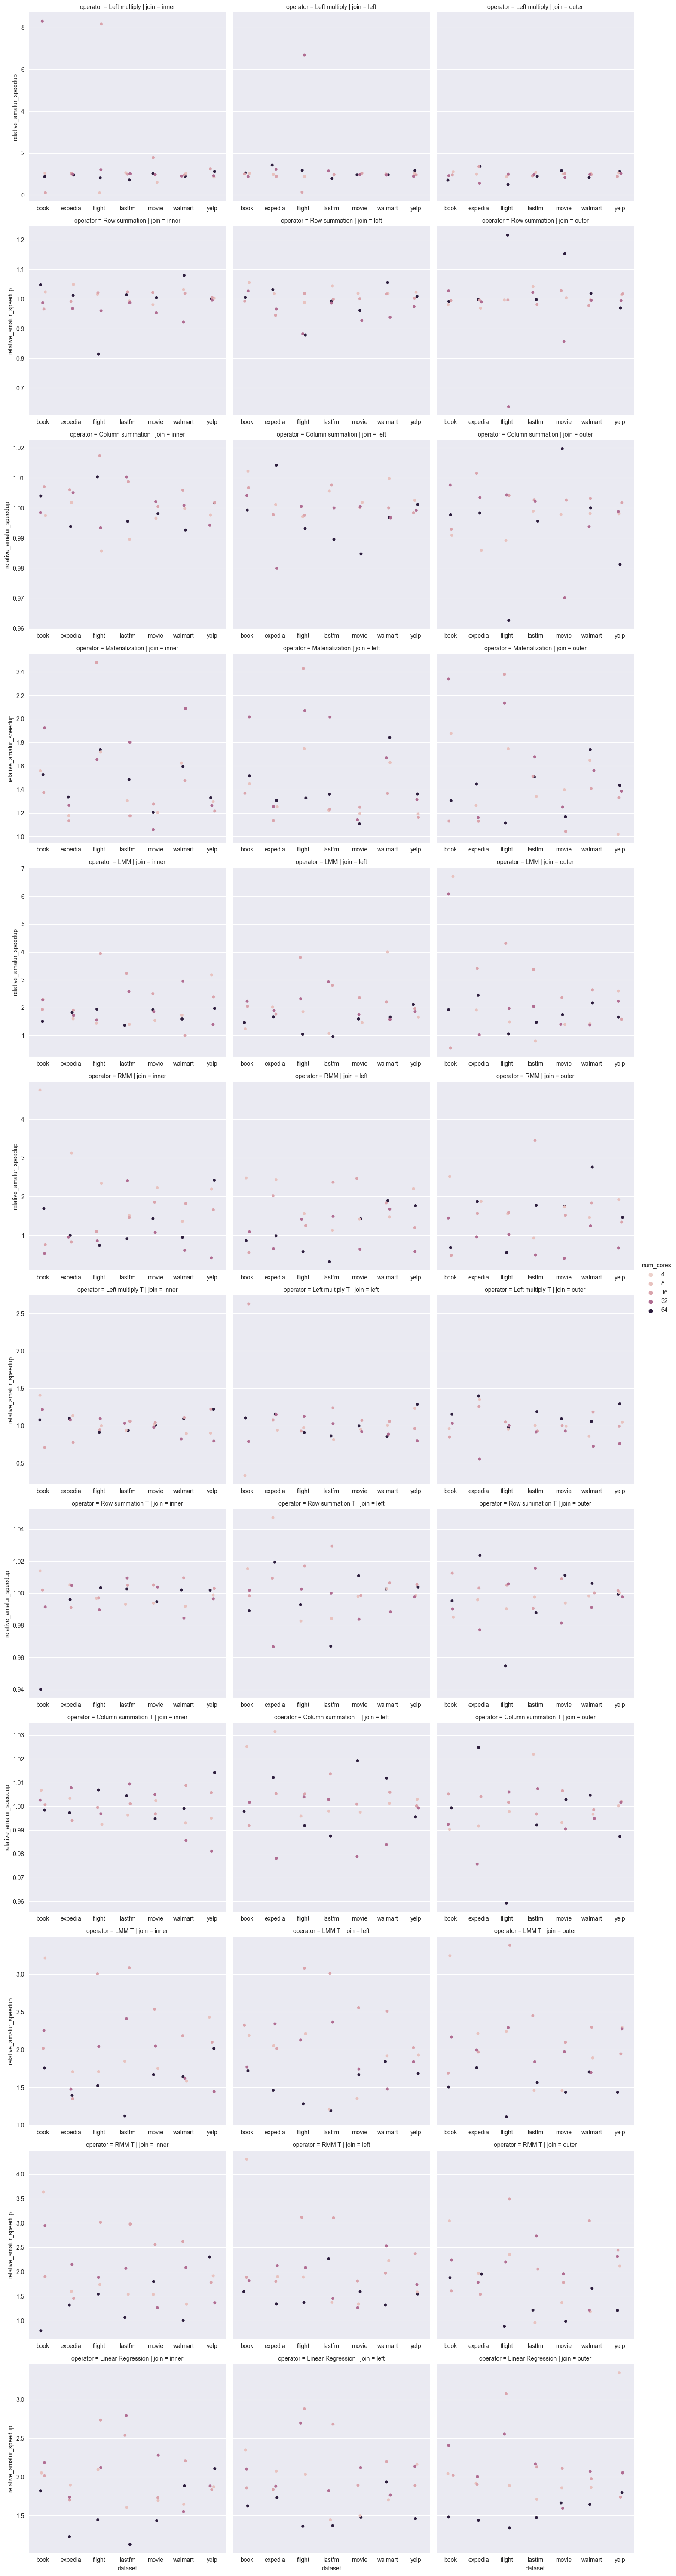

In [195]:
fig = sns.catplot(data=df, x='dataset', y='relative_amalur_speedup', hue='num_cores', col='join', row='operator', sharex=False, sharey="row")

## Analysis
What speedup do we analyze. Compare to baseline, or compare to amalur other runtimes?
Questions
1. What is the relation between amalur and baseline speedup?
1. Is the effect on speedup different per operator?
2. Is the speedup correlated with the Tuple/Feature ratio?
3.

In [187]:
# x axis: number of cores
# y axis: time
# hue: baseline/amalur

dfm = df.melt(id_vars=['dataset', 'join', 'operator', 'num_cores'], value_vars=['relative_baseline_speedup', 'relative_amalur_speedup'], value_name='rel_speedup', var_name=['benchmark'])
dfm

,dataset,join,operator,num_cores,benchmark,rel_speedup
0,book,inner,Left multiply,64,relative_baseline_speedup,1.025490
1,book,inner,Row summation,64,relative_baseline_speedup,1.023193
2,book,inner,Column summation,64,relative_baseline_speedup,1.007065
3,book,inner,Materialization,64,relative_baseline_speedup,NaN
4,book,inner,LMM,64,relative_baseline_speedup,1.032401
...,...,...,...,...,...,...
2515,yelp,outer,Row summation T,32,relative_amalur_speedup,0.997661
2516,yelp,outer,Column summation T,32,relative_amalur_speedup,1.001719
2517,yelp,outer,LMM T,32,relative_amalur_speedup,2.275970
2518,yelp,outer,RMM T,32,relative_amalur_speedup,2.314231


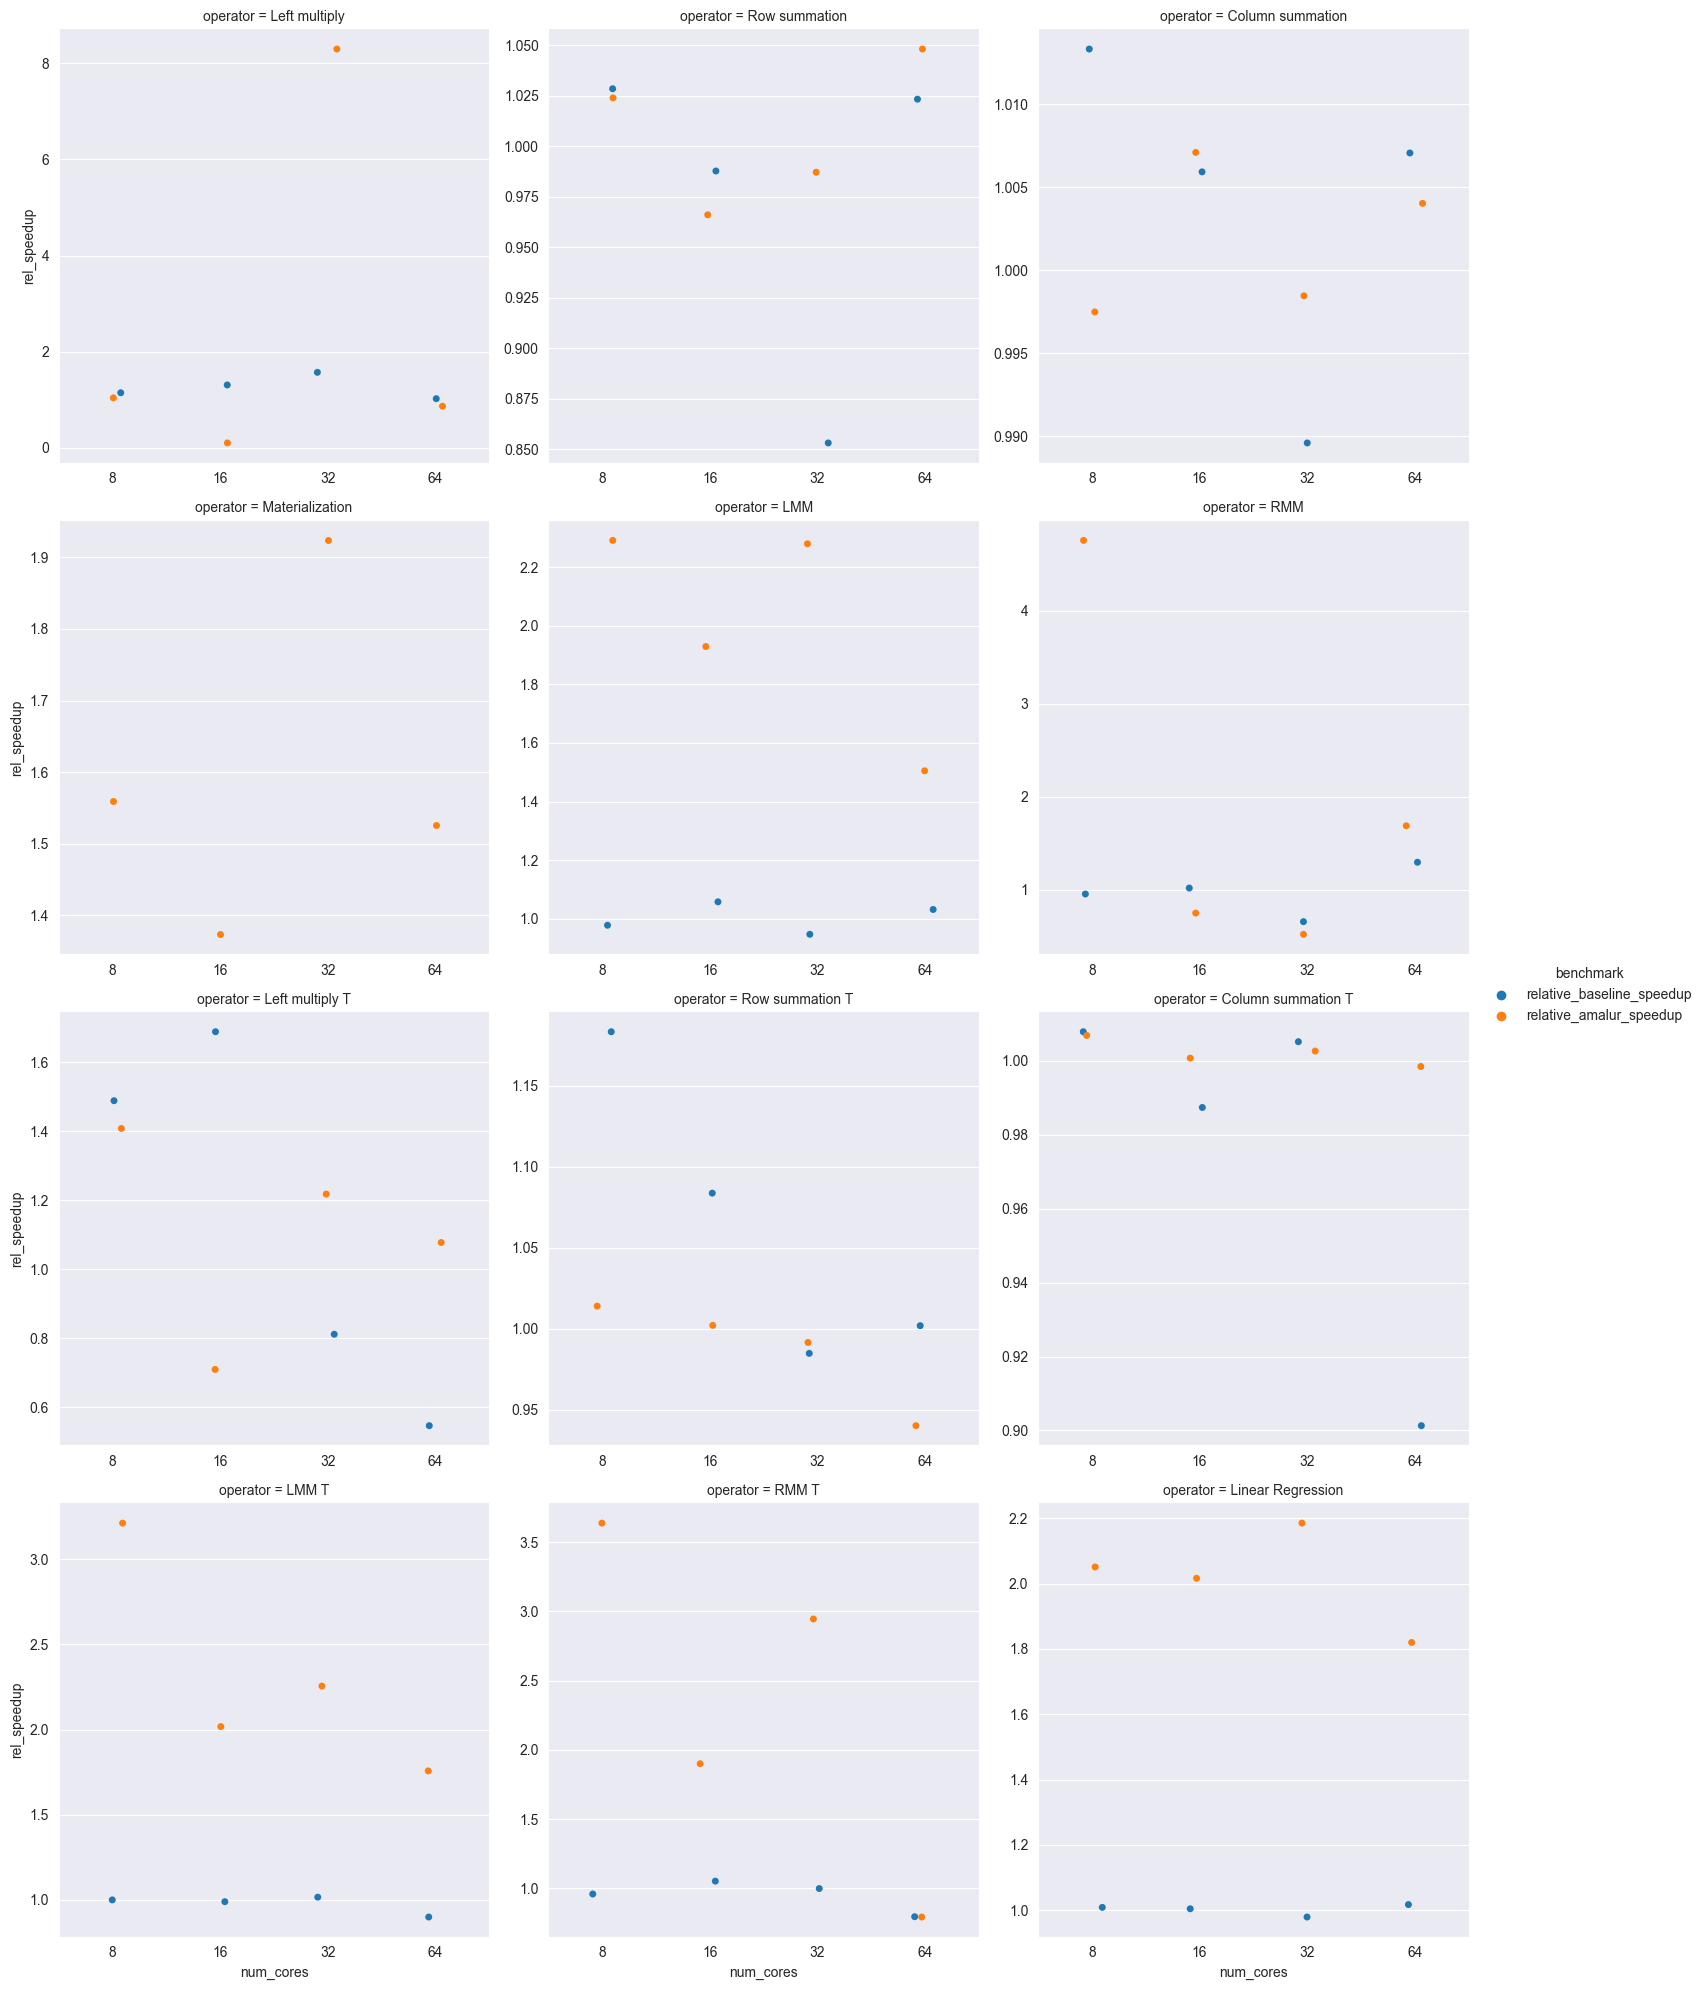

In [188]:
sns.catplot(data=dfm[(dfm['join'] == 'inner') & (dfm.dataset == 'book')], x='num_cores', y='rel_speedup', hue='benchmark', col='operator', col_wrap=3, sharex=False, sharey=False)

<Axes: >

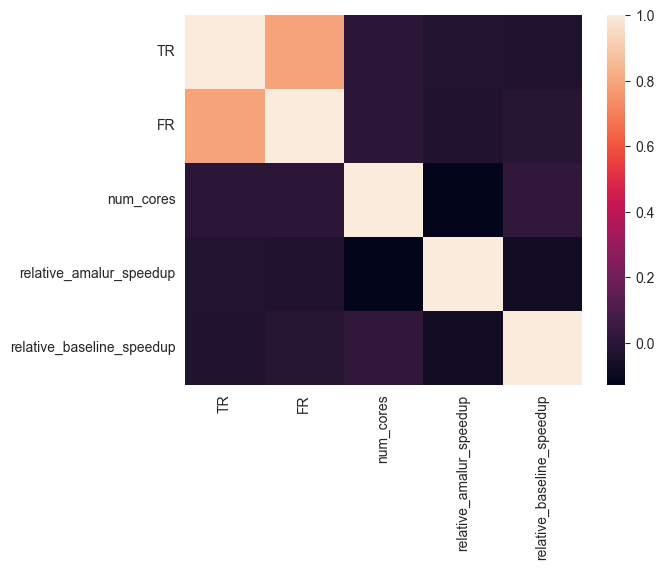

In [194]:
sns.heatmap(df[['TR', 'FR', 'num_cores', 'relative_amalur_speedup', 'relative_baseline_speedup']].corr())